<a href="https://colab.research.google.com/github/kari-hub/Week_7-project/blob/master/Moringa_school_data_science_cohort_3_independent_project_week_7_Sarah_Wangari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company Project.

## 1. Defining the Question


### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success


### c) Understanding the context


### d) Recording the Experimental Design


### e) Data Relevance


## 2. Reading the Data


In [0]:
# Loading the respective libraries to be used in our analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [0]:
# Loading our datasets

house = pd.read_csv('Independent Project Week 7 - house_data.csv')

## 3. Checking the Data


In [0]:
# Previewing our data
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Previewing the bottom of our dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Determining the number of records in our data

house.shape

(21613, 20)

In [0]:
# Describing our data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# Checking whether our data has the right data types.
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation


Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do [here]([http://bit.ly/IndependentProjectWeek7Dataset).
This is a very important step to providing credibility to your dataset.

## 5. Tidying the Dataset


In [0]:
# Checking for null values.
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# Checking for any duplicated values in our data

house.duplicated().sum()

3

In [0]:
# Dropping duplicated values in our data

house.drop_duplicates(inplace=True)

In [0]:
# Confirming that we have no duplicated values

house.duplicated().values.sum()

0

In [0]:
# Checking our column names

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Renaming our column names

house.columns = ['ID', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors', 'WaterFront', 'View', 'Condition', 'Grade', 'Sqft_Above', 'Sqft_Basement', 'Year_Built', 'Year_Renovated', 'ZipCode', 'Latitude', 'Longitude', 'Sqft_Living15', 'Sqft_Lot15']


In [0]:
house.columns

Index(['ID', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot',
       'Floors', 'WaterFront', 'View', 'Condition', 'Grade', 'Sqft_Above',
       'Sqft_Basement', 'Year_Built', 'Year_Renovated', 'ZipCode', 'Latitude',
       'Longitude', 'Sqft_Living15', 'Sqft_Lot15'],
      dtype='object')

In [0]:
# Counting the number of outliers in our columns in our data

def detect_outlier(house):
  outliers = []
  threshold = 3
  mean_1 = np.mean(house)
  std_1 = np.std(house)

  for y in house:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers     

In [0]:
# Counting the number of outliers in our data and their percentages

for col in house:
  rows, columns = house.shape
  percent_coefficient = float(100 / rows)
  outliers = detect_outlier(house[col])
  outliers_count = len(outliers)
  outliers_percentage = outliers_count * percent_coefficient
  print(f"{col} has {outliers_count} outliers in total, which is{outliers_percentage:.2}% of data" )

ID has 0 outliers in total, which is0.0% of data
Price has 406 outliers in total, which is1.9% of data
Bedrooms has 75 outliers in total, which is0.35% of data
Bathrooms has 187 outliers in total, which is0.87% of data
Sqft_Living has 248 outliers in total, which is1.1% of data
Sqft_Lot has 347 outliers in total, which is1.6% of data
Floors has 8 outliers in total, which is0.037% of data
WaterFront has 163 outliers in total, which is0.75% of data
View has 828 outliers in total, which is3.8% of data
Condition has 30 outliers in total, which is0.14% of data
Grade has 136 outliers in total, which is0.63% of data
Sqft_Above has 254 outliers in total, which is1.2% of data
Sqft_Basement has 247 outliers in total, which is1.1% of data
Year_Built has 0 outliers in total, which is0.0% of data
Year_Renovated has 913 outliers in total, which is4.2% of data
ZipCode has 0 outliers in total, which is0.0% of data
Latitude has 0 outliers in total, which is0.0% of data
Longitude has 233 outliers in tot

In [0]:
# Dropping outliers from our data
from scipy import stats

z = np.abs(stats.zscore(house))
print(z)

[[0.88620095 0.8663502  0.39872223 ... 0.30597436 0.94325844 0.2607194 ]
 [0.63756365 0.00593105 0.39872223 ... 0.74622283 0.43261512 0.18787651]
 [0.36549513 0.98040133 1.4738891  ... 0.1355556  1.07013523 0.17238503]
 ...
 [1.06270864 0.37584596 1.4738891  ... 0.60420719 1.41013234 0.39413652]
 [1.49100637 0.38156485 0.39872223 ... 1.0289726  0.84112978 0.42050499]
 [1.06270864 0.58571365 1.4738891  ... 0.60420719 1.41013234 0.41794139]]


In [0]:
# Confirming that our outliers have been dropped 
data = house[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {house.shape[0]}")
print(f"New dataframe : {data.shape[0]}")

Previous dataframe size : 21610
New dataframe : 18700


In [0]:
# Saving our data without outliers

data.to_csv('new_data.csv')

## 6. Exploratory Analysis


### **Univariate Analysis**

In [0]:
# Loading our cleaned data 

house = pd.read_csv('new_data.csv')
house.head()

,Unnamed: 0,ID,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [0]:
# Dropping the unnamed column

house.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [0]:
# Checking the shape of our data

house.shape

(18700, 19)

In [0]:
# Checking for null values in our new data

house.isnull().sum()

Price             0
Bedrooms          0
Bathrooms         0
Sqft_Living       0
Sqft_Lot          0
Floors            0
WaterFront        0
View              0
Condition         0
Grade             0
Sqft_Above        0
Sqft_Basement     0
Year_Built        0
Year_Renovated    0
ZipCode           0
Latitude          0
Longitude         0
Sqft_Living15     0
Sqft_Lot15        0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


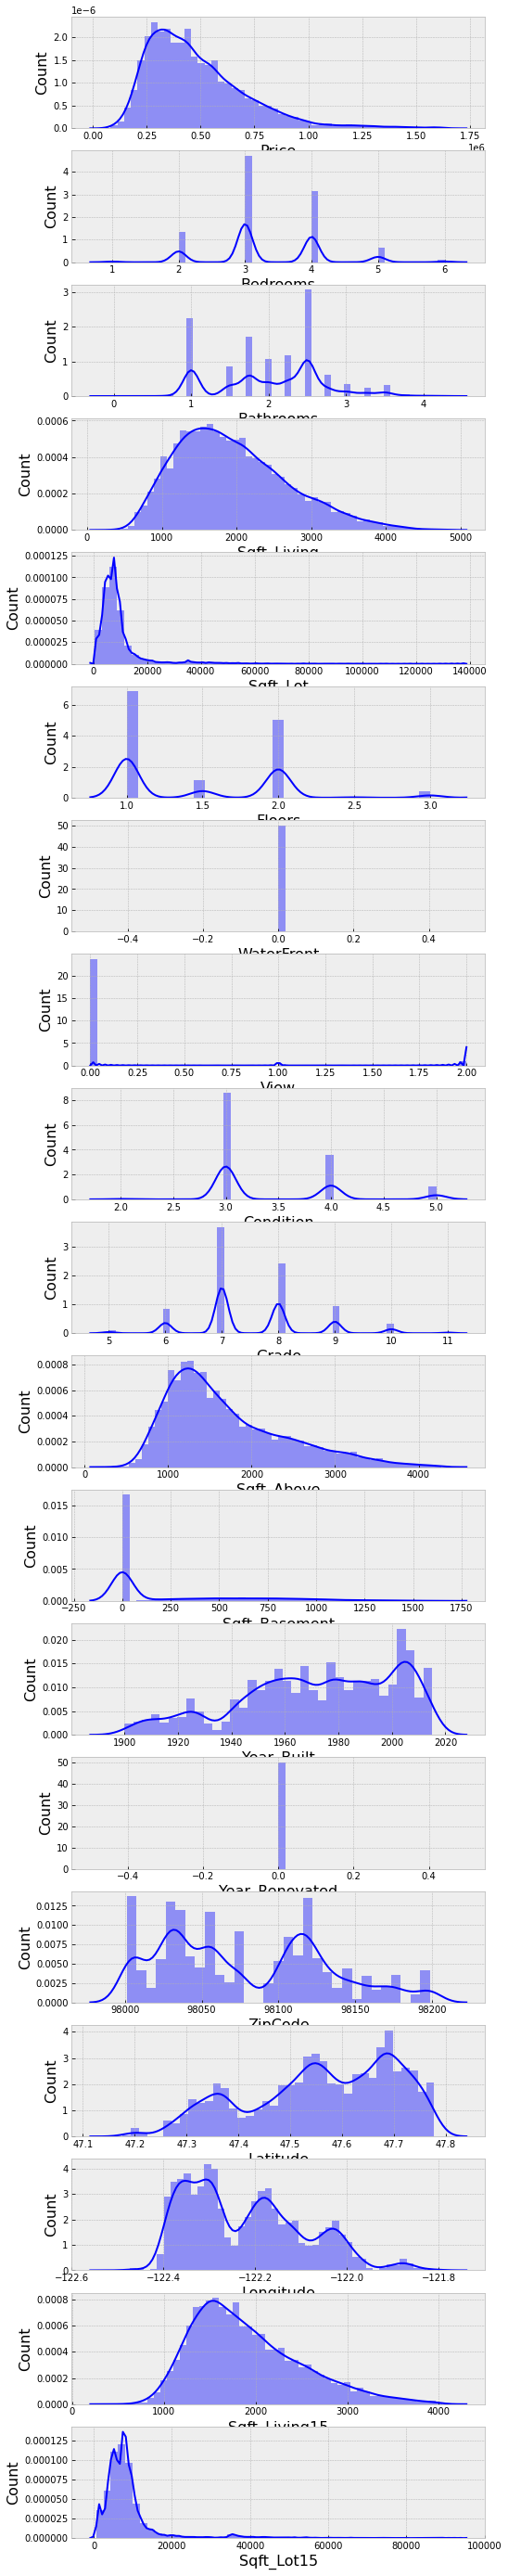

In [0]:
# Plotting subplots for our univariate summaries
plt.style.use('bmh')

columns = ['Price',	'Bedrooms',	'Bathrooms',	'Sqft_Living',\
            'Sqft_Lot',	'Floors',	'WaterFront',	'View',	'Condition',\
            'Grade',	'Sqft_Above',	'Sqft_Basement',	'Year_Built',	'Year_Renovated',\
            'ZipCode',	'Latitude',	'Longitude', 'Sqft_Living15',	'Sqft_Lot15']


fig, ax = plt.subplots(house.shape[1], figsize=(8,50))

for i, col_val in enumerate(columns):
  sns.distplot(house[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(f"{col_val}", fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

In [0]:
# Determining the mean of our label

house['Price'].mean()

480949.37962566846

In [0]:
# Measuring kurtosis in our data

house.kurt()

Price              2.574198
Bedrooms           0.291537
Bathrooms         -0.520557
Sqft_Living        0.065438
Sqft_Lot          32.057558
Floors            -0.433667
WaterFront         0.000000
View              17.359258
Condition          0.283383
Grade              0.587308
Sqft_Above         0.486397
Sqft_Basement      0.591974
Year_Built        -0.602056
Year_Renovated     0.000000
ZipCode           -0.869050
Latitude          -0.765010
Longitude         -0.427118
Sqft_Living15      0.326593
Sqft_Lot15        24.353305
dtype: float64

In [0]:
# Measuring the skewness of our data

house.skew()

Price             1.345335
Bedrooms          0.261772
Bathrooms         0.028446
Sqft_Living       0.656828
Sqft_Lot          4.875938
Floors            0.667072
WaterFront        0.000000
View              4.341944
Condition         1.089531
Grade             0.589916
Sqft_Above        0.996303
Sqft_Basement     1.321637
Year_Built       -0.484522
Year_Renovated    0.000000
ZipCode           0.385974
Latitude         -0.464525
Longitude         0.590310
Sqft_Living15     0.812558
Sqft_Lot15        4.314868
dtype: float64

In [0]:
# Determining the standard deviation of our data

house.std()

Price             231434.401431
Bedrooms               0.848167
Bathrooms              0.687642
Sqft_Living          737.988254
Sqft_Lot           11369.422710
Floors                 0.540259
WaterFront             0.000000
View                   0.400090
Condition              0.647886
Grade                  1.025127
Sqft_Above           707.886462
Sqft_Basement        387.275077
Year_Built            28.970667
Year_Renovated         0.000000
ZipCode               53.307366
Latitude               0.140210
Longitude              0.128619
Sqft_Living15        598.728482
Sqft_Lot15          8930.815939
dtype: float64

In [0]:
# Determining the variance in our data

house.var()

Price             5.356188e+10
Bedrooms          7.193871e-01
Bathrooms         4.728519e-01
Sqft_Living       5.446267e+05
Sqft_Lot          1.292638e+08
Floors            2.918801e-01
WaterFront        0.000000e+00
View              1.600716e-01
Condition         4.197568e-01
Grade             1.050885e+00
Sqft_Above        5.011032e+05
Sqft_Basement     1.499820e+05
Year_Built        8.392995e+02
Year_Renovated    0.000000e+00
ZipCode           2.841675e+03
Latitude          1.965875e-02
Longitude         1.654294e-02
Sqft_Living15     3.584758e+05
Sqft_Lot15        7.975947e+07
dtype: float64

### **Bivariate Analysis**

In [0]:
# Determining the correlation coeffients of our data columns
values = house.drop(columns=['Year_Renovated', 'WaterFront'])

correlations = values.corr()

correlations

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
Price,1.000000,0.302808,0.442799,0.622058,0.100850,0.276167,0.182548,0.049966,0.634594,0.533148,0.210865,0.065049,-0.042088,0.427902,0.075768,0.550730,0.092875
Bedrooms,0.302808,1.000000,0.488936,0.608989,0.112728,0.160546,0.038684,0.023214,0.334305,0.485852,0.272413,0.176868,-0.179377,-0.042531,0.184070,0.407067,0.114411
Bathrooms,0.442799,0.488936,1.000000,0.711358,0.063386,0.519367,0.066410,-0.145599,0.619044,0.632672,0.199120,0.585972,-0.232357,-0.005694,0.288834,0.537757,0.066972
Sqft_Living,0.622058,0.608989,0.711358,1.000000,0.231021,0.356824,0.122604,-0.074782,0.711347,0.857320,0.338528,0.371124,-0.228532,0.029259,0.317487,0.750160,0.234743
Sqft_Lot,0.100850,0.112728,0.063386,0.231021,1.000000,-0.101730,0.031274,0.045786,0.142619,0.212990,0.050915,0.023067,-0.180437,-0.052453,0.272173,0.269967,0.817125
Floors,0.276167,0.160546,0.519367,0.356824,-0.101730,1.000000,-0.016567,-0.288838,0.473657,0.538064,-0.303547,0.537953,-0.068750,0.036622,0.153597,0.279987,-0.104930
View,0.182548,0.038684,0.066410,0.122604,0.031274,-0.016567,1.000000,0.033750,0.106621,0.041749,0.157322,-0.060446,0.083978,0.009822,-0.077278,0.142537,0.018078
Condition,0.049966,0.023214,-0.145599,-0.074782,0.045786,-0.288838,0.033750,1.000000,-0.182750,-0.184518,0.194770,-0.399093,-0.000447,-0.008244,-0.100900,-0.119170,0.053807
Grade,0.634594,0.334305,0.619044,0.711347,0.142619,0.473657,0.106621,-0.182750,1.000000,0.716105,0.046594,0.499213,-0.200103,0.102835,0.253638,0.676104,0.157701
Sqft_Above,0.533148,0.485852,0.632672,0.857320,0.212990,0.538064,0.041749,-0.184518,0.716105,1.000000,-0.194163,0.474050,-0.288846,-0.029609,0.420450,0.731724,0.222116


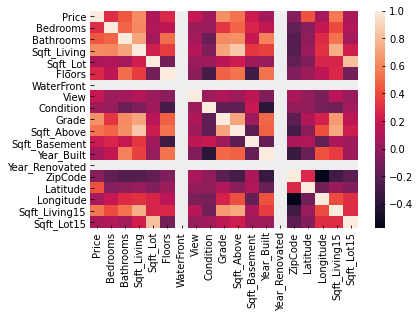

In [0]:
sns.heatmap(house.corr())
plt.show()

### **Multicollinearity and heteroskedasticity tests**

In [0]:
# As we have already found the correlation of our data, we will then proceed to find the VIF.

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
Price,3.117703,0.164269,-0.257247,-5.233122e-01,-0.042272,-0.220703,-0.208920,-0.252830,-1.179884,-4.541699e-01,-2.052333e-01,0.851565,0.236698,-1.072034,0.166384,-0.352792,0.163613
Bedrooms,0.164269,1.724275,-0.392200,-8.938340e-01,0.036948,0.077416,0.047893,-0.052262,0.226604,-2.772562e-01,-1.463901e-01,0.183932,0.106996,0.012252,0.034312,0.052780,0.022484
Bathrooms,-0.257247,-0.392200,3.142881,-1.369513e+00,0.037216,-0.701546,-0.017728,-0.157545,-0.110585,3.904505e-01,-2.899022e-01,-1.086159,0.035292,0.056895,-0.021650,0.003047,0.089750
Sqft_Living,-0.522550,-0.894646,-1.367778,-1.932389e+13,-0.316534,0.405138,-0.377588,-0.991002,-0.470221,1.853569e+13,1.014062e+13,-0.115307,-0.205714,0.028316,0.246446,-1.026516,0.092781
Sqft_Lot,-0.042272,0.036948,0.037216,-3.190874e-01,3.050374,0.094437,-0.035051,0.039302,0.031987,5.078615e-02,7.018691e-02,0.089659,0.037950,0.046009,-0.061343,0.049601,-2.421218
Floors,-0.220703,0.077416,-0.701546,4.091818e-01,0.094437,2.220195,0.001372,0.108570,-0.155513,-9.609159e-01,4.219041e-01,-0.560558,-0.184559,-0.066183,0.173219,0.318780,0.169290
View,-0.208920,0.047893,-0.017728,-3.774097e-01,-0.035051,0.001372,1.090588,0.011273,-0.009680,4.781026e-01,1.122405e-01,0.054743,-0.109920,0.145354,0.050925,-0.197829,0.029909
Condition,-0.252830,-0.052262,-0.157545,-9.904490e-01,0.039302,0.108570,0.011273,1.293803,0.060655,1.055060e+00,4.511713e-01,0.528847,0.142895,0.144783,-0.048924,0.145283,-0.096369
Grade,-1.179884,0.226604,-0.110585,-4.654624e-01,0.031987,-0.155513,-0.009680,0.060655,3.361097,-5.093740e-01,1.351125e-02,-0.944370,0.006500,0.080463,0.341526,-0.659091,-0.124421
Sqft_Above,-0.451531,-0.275820,0.389263,1.853569e+13,0.048188,-0.957693,0.478369,1.055691,-0.504981,-1.777964e+13,-9.726997e+12,0.280776,-0.005107,0.478843,-0.656183,-0.578187,-0.170912


## 7. Implementing the solution

### **Multiple Linear Regression**

In [0]:
house.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [0]:
# Dividing our data into training and testing sets

from sklearn.model_selection import train_test_split

X = house.iloc[:, 1:20]
y = house.iloc[:, 0]

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


       Bedrooms  Bathrooms  Sqft_Living  ...  Longitude  Sqft_Living15  Sqft_Lot15
0             3       1.00         1180  ...   -122.257           1340        5650
1             2       1.00          770  ...   -122.233           2720        8062
2             4       3.00         1960  ...   -122.393           1360        5000
3             3       2.00         1680  ...   -122.045           1800        7503
4             3       2.25         1715  ...   -122.327           2238        6819
...         ...        ...          ...  ...        ...            ...         ...
18695         3       2.50         1530  ...   -122.346           1530        1509
18696         4       2.50         2310  ...   -122.362           1830        7200
18697         2       0.75         1020  ...   -122.299           1020        2007
18698         3       2.50         1600  ...   -122.069           1410        1287
18699         2       0.75         1020  ...   -122.299           1020        1357

[18

In [0]:
# Training our algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Finding the most optimal coefficients for our attributes

coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Bedrooms,-1.362209e+04
Bathrooms,2.464113e+04
Sqft_Living,6.298372e+01
Sqft_Lot,3.051330e-01
Floors,3.362312e+04
WaterFront,-2.284958e-08
View,4.067950e+04
Condition,2.982883e+04
Grade,8.620596e+04
Sqft_Above,3.449872e+01


In [0]:
# Making our predictions on the test data

y_pred = regressor.predict(X_test)

# Determining the comparison between the actual output values with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We can clearly see how inaccurate our model is since it has a great margin of error.


,Actual,Predicted
12854,285000.0,373446.905639
10755,320000.0,465246.174476
10549,227000.0,256243.112105
5773,520000.0,582697.604062
4547,375000.0,522129.289705
...,...,...
4696,325000.0,410111.363698
13504,710000.0,717400.624049
12864,251000.0,187425.305112
2446,534000.0,420233.574495


In [0]:
# We will then evaluate our algorithm

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 94972.34358207628
Mean Squared Error: 17996474354.114376
Root Mean Squared Error: 134150.93870008652


We can see that our RMSE value is greater than 10% of the mean value of our label, which is the price of our houses. This means that our algorithm is not accurate and can lead to very many errors. This might be treated as a reason to use a different regression method to build a more accurate model for our predictions.

### **Heteroskedasticity tests and residual plot.**

In [0]:
# Using the model we have created above to display the residual plots.

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# We will then create the residual by subtracting the test value from the predicted value for each row in our data.

residual = np.subtract(y_pred, y_test)

# Describing the residual

pd.DataFrame(residual).describe()

residual.mean()

-547.1327038832021

Our mean shows that by using this model, our chances of overestimation are extremely high.

Showing the residual plots.

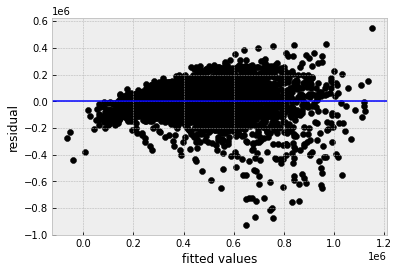

In [0]:
plt.scatter(y_pred, residual, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residual.mean(), color='blue', linewidth=1.5)
plt.show()

In [0]:
# Using Bartlett's test to perform our heteroskedasticity test
# The test establishes as a null hypothesis that the variance is equal for all our datapoints, 
# and the new hypothesis that the variance is different for at least one pair of datapoints. 

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)
 
# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred) - 1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassesed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### **Quantile Regression**


In [0]:
# Quantile regression

house.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


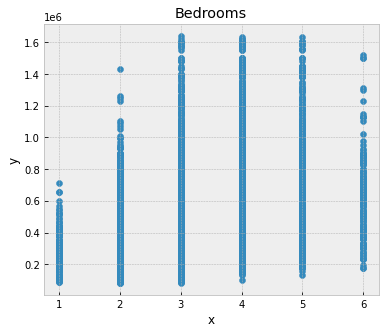

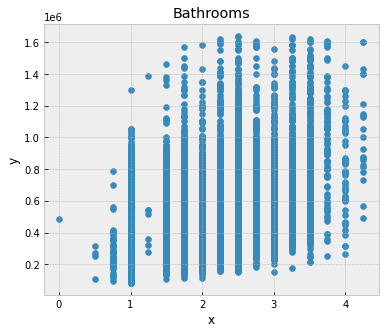

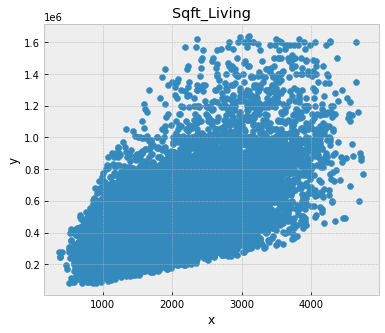

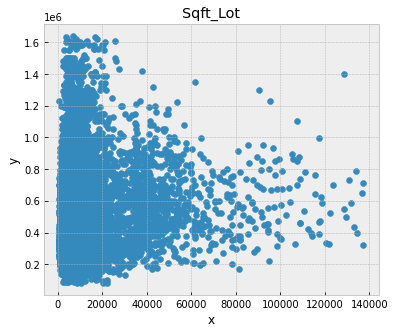

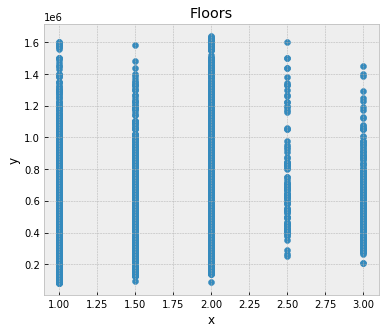

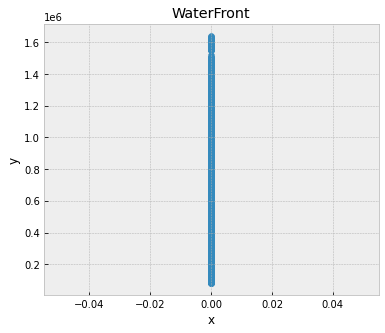

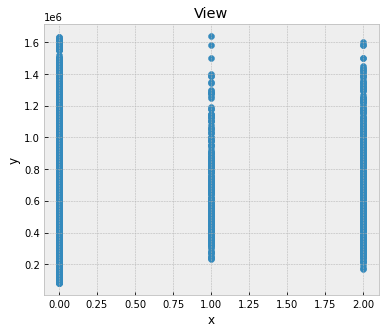

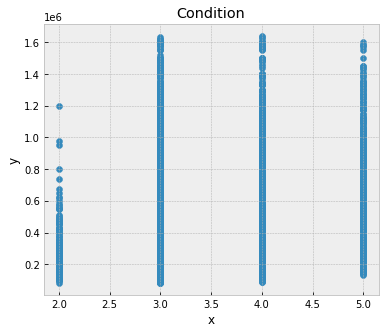

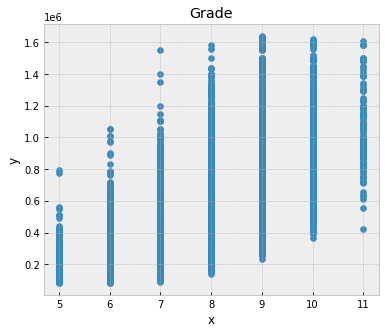

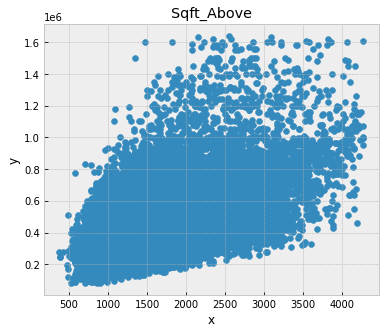

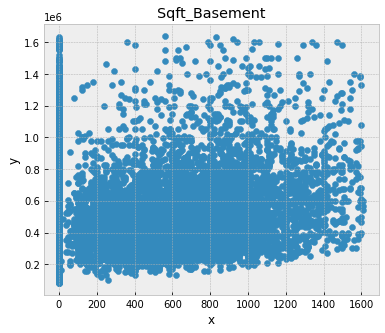

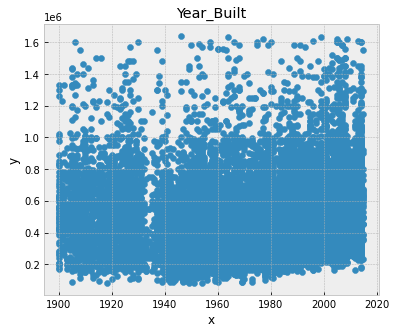

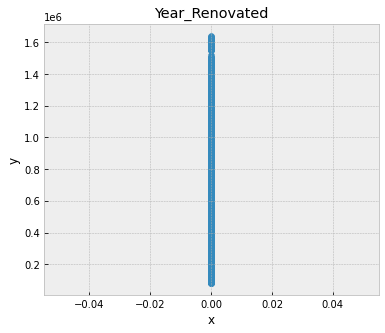

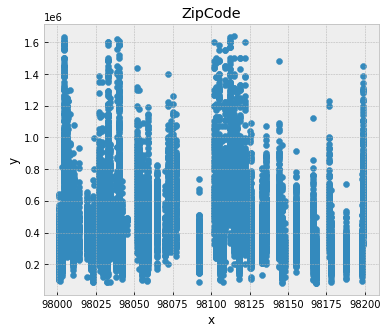

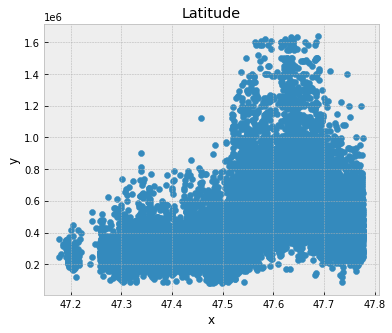

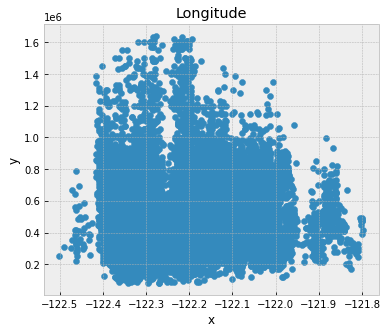

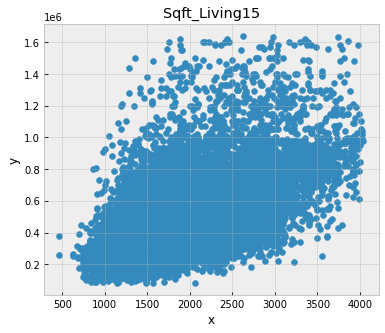

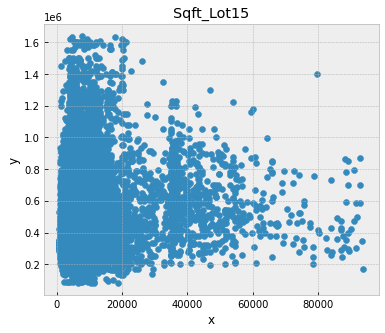

In [0]:
# Creating scatter plots for the columns in our data
features = ['Bedrooms',	'Bathrooms', 'Sqft_Living',	'Sqft_Lot',	'Floors',	'WaterFront',	'View',	'Condition',	'Grade', 'Sqft_Above', 'Sqft_Basement',	'Year_Built',	'Year_Renovated',	'ZipCode', 'Latitude', 'Longitude',	'Sqft_Living15', 'Sqft_Lot15']

for i,colval in enumerate(features):
  x = np.array(house[colval].values.reshape(-1,1))
  y = np.array(house['Price'])

  figure,ax = plt.subplots(figsize=(6,5))
  
  plt.scatter(x,y)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"{colval}")

In [0]:
# Splitting our data using the linear regression method

# Splitting our data into our attributes and label

X = features

bedroom = house['Bedrooms'].values
bathroom = house['Bathrooms'].values
sqftliving = house['Sqft_Living'].values
sqftlot = house['Sqft_Lot'].values
floors = house['Floors'].values
grade = house['Grade'].values

y = house['Price'].values

In [0]:
# Using quantile regression method to create our model.

model = smf.quantreg('y ~ sqftliving', house)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res = model.fit(q = q)
  models.append(res)
  param.append([q, res.params['Intercept'], res.params['sqftliving']] + res.conf_int().loc['sqftliving'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'sqftliving_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2014
Model:                       QuantReg   Bandwidth:                   3.138e+04
Method:                 Least Squares   Sparsity:                    4.635e+05
Date:                Sun, 07 Jun 2020   No. Observations:                18700
Time:                        21:00:33   Df Residuals:                    18698
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.78e+04   4786.210     20.433      0.000    8.84e+04    1.07e+05
sqftliving   187.5926      2.297     81.685      0.000     183.091     192.094

The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


,quantile,intercept,sqftliving_coef,cf_lower_bound,cf_upper_bound
0,0.25,61785.714291,143.571429,140.616658,146.526200
1,0.50,97798.148160,187.592593,183.091151,192.094034
2,0.75,170490.196070,210.784314,205.991275,215.577352


In [0]:
# Do a Linear regression using OLS

ols = smf.ols('y ~ sqftliving', house).fit()
print(ols.summary())

param1 = ols.conf_int().loc['sqftliving'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           sqftliving_coef = ols.params['sqftliving'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:13:54   Log-Likelihood:            -2.5294e+05
No. Observations:               18700   AIC:                         5.059e+05
Df Residuals:                   18698   BIC:                         5.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.007e+05   3742.339     26.916      0.0

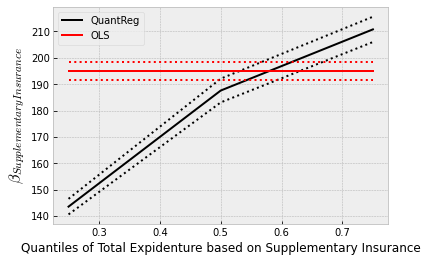

In [0]:
# Comparing our linear regression and quantile regression models 

n = param.shape[0]
p1 = plt.plot(param['quantile'], param['sqftliving_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['sqftliving_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.ylabel(r'$\beta_{Supplementary Insurance}$', fontsize = 16)
plt.xlabel('Quantiles of Total Expidenture based on Supplementary Insurance')
plt.legend()
plt.show()

# Our quantile regression model assumes a different shape from the one created using linear regression

In [0]:
# Using quantile regression method to create our model.

model = smf.quantreg('y ~ grade', house)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res = model.fit(q = q)
  models.append(res)
  param.append([q, res.params['Intercept'], res.params['grade']] + res.conf_int().loc['grade'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'grade_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2274
Model:                       QuantReg   Bandwidth:                   2.948e+04
Method:                 Least Squares   Sparsity:                    4.076e+05
Date:                Sun, 07 Jun 2020   No. Observations:                18700
Time:                        21:05:59   Df Residuals:                    18698
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.67e+05   1.11e+04    -51.284      0.000   -5.89e+05   -5.45e+05
grade        1.36e+05   1453.679     93.556      0.000    1.33e+05    1.39e+05
*****************************************************************
Intercept   -566999.999995
grade        135999.999999
dtype: floa

,quantile,intercept,grade_coef,cf_lower_bound,cf_upper_bound
0,0.25,-486666.666661,111166.666666,108982.855335,113350.477997
1,0.50,-566999.999995,135999.999999,133150.656143,138849.343855
2,0.75,-564000.000000,151000.000000,146975.790139,155024.209861


In [0]:
# Do a Linear regression using OLS

ols = smf.ols('y ~ grade', house).fit()
print(ols.summary())

param1 = ols.conf_int().loc['grade'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           grade_coef = ols.params['grade'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:07:36   Log-Likelihood:            -2.5270e+05
No. Observations:               18700   AIC:                         5.054e+05
Df Residuals:                   18698   BIC:                         5.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.987e+05   9704.631    -61.696      0.0

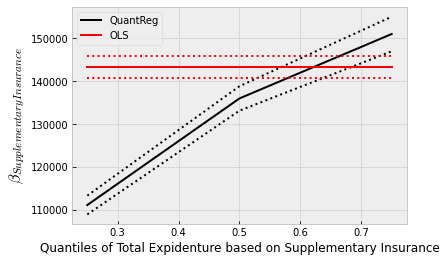

In [0]:
# Comparing our linear regression and quantile regression models 

n = param.shape[0]
p1 = plt.plot(param['quantile'], param['grade_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['grade_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.ylabel(r'$\beta_{Supplementary Insurance}$', fontsize = 16)
plt.xlabel('Quantiles of Total Expidenture based on Supplementary Insurance')
plt.legend()
plt.show()

In [0]:
# Determining the mean variances for our columns

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params.

for i, colval in enumerate(features):
  x = np.array(house[colval].values.reshape(-1,1))
  y = np.array(house['Price'])

  model1 = LinearRegression(fit_intercept=True, normalize=False)
  model1.fit(x,y)

  y_pred1 = model1.predict(x)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred1 - y) ** 2)))
  print('Variance score: {0:.2f}'.format(model1.score(x, y)))
  print("\n==============================\n")

           | Bedrooms |

Mean squared error: 48648041838.58
Variance score: 0.09


           | Bathrooms |

Mean squared error: 43057671431.14
Variance score: 0.20


           | Sqft_Living |

Mean squared error: 32834048962.52
Variance score: 0.39


           | Sqft_Lot |

Mean squared error: 53014280675.83
Variance score: 0.01


           | Floors |

Mean squared error: 49474161131.78
Variance score: 0.08


           | WaterFront |

Mean squared error: 53559017894.00
Variance score: 0.00


           | View |

Mean squared error: 51774227337.29
Variance score: 0.03


           | Condition |

Mean squared error: 53425304362.46
Variance score: 0.00


           | Grade |

Mean squared error: 31990258698.35
Variance score: 0.40


           | Sqft_Above |

Mean squared error: 38335022129.26
Variance score: 0.28


           | Sqft_Basement |

Mean squared error: 51177565601.77
Variance score: 0.04


           | Year_Built |

Mean squared error: 53332387289.43
Variance score: 0.00

### **Ridge Regression**


In [0]:
# Loading our dataset

house.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [0]:
# Splitting our data into training and testing sets

X = house.iloc[:, 1:20]
y = house.iloc[:, 0]

In [0]:
# Creating our baseline model with no regularisation

regressor = LinearRegression()
regressor.fit(X, y)
first_model = (mean_squared_error(y_true=y, y_pred=regressor.predict(X)))
print(first_model)

17178997107.644659


In [0]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength.

search.fit(X, y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

# The result obtained here shows that our ridge model might be worse that the baseline model

17370305199.12653

In [0]:
# Fitting the ridge regression model into our data.

ridge = Ridge(normalize=True, alpha=0.01)
ridge.fit(X, y)
second_model = (mean_squared_error(y_true=y, y_pred=ridge.predict(X)))
print(second_model)

17182143469.32552


In [0]:
# Coefficients for our baseline model 

coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Bathrooms': 63.923578388784875,
 'Bedrooms': 27770.344125016978,
 'Condition': 85438.73196794526,
 'Floors': 1.8642026589077432e-08,
 'Grade': 35.988084661307354,
 'Latitude': -96028.32833313684,
 'Longitude': 43.74029774251353,
 'Price': -14376.956153454055,
 'Sqft_Above': 27.93549365583824,
 'Sqft_Basement': -2181.9884734266752,
 'Sqft_Living': 0.27599910093616586,
 'Sqft_Living15': -1.3599414476229867,
 'Sqft_Lot': 30324.90318768828,
 'View': 28968.270905126552,
 'WaterFront': 38762.823206614485,
 'Year_Built': -5.820766091346741e-11,
 'Year_Renovated': -329.60974353417834,
 'ZipCode': 567575.6455704435}

In [0]:
# Coefficients of the ridge regression model 

coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_,house.columns):
    coef_dict_ridge[feat] = coef
coef_dict_ridge

# The coefficients for both models vary to a great extent, which shows that the penalization had a significant effect on our data
# The ridge regression also completely removes the Floors and Year_Built columns, showing that they are insignificant to our data.


{'Bathrooms': 53.357099160747815,
 'Bedrooms': 27215.5240797024,
 'Condition': 83750.81150586573,
 'Floors': 0.0,
 'Grade': 46.473048691714844,
 'Latitude': -96551.80906978488,
 'Longitude': 44.7302565352057,
 'Price': -13806.697195495199,
 'Sqft_Above': 38.48397834377258,
 'Sqft_Basement': -2121.9180282178227,
 'Sqft_Living': 0.25201257976335817,
 'Sqft_Living15': -1.3091331296674598,
 'Sqft_Lot': 30022.444572077853,
 'View': 29144.617229483483,
 'WaterFront': 38747.807261394635,
 'Year_Built': 0.0,
 'Year_Renovated': -316.17877910073605,
 'ZipCode': 563760.956390361}

### **Lasso Regression**


In [0]:
# Loading our data

house.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [0]:
# Splitting our data and scaling it.

from sklearn.preprocessing import StandardScaler

# Creating our attributes and labels

X = house[['Bedrooms', 'Bathrooms',	'Sqft_Living',	'Sqft_Lot',	'Floors',	'WaterFront',	'View',	'Condition',	'Grade',	'Sqft_Above',	'Sqft_Basement',	'Year_Built',	'Year_Renovated',	'ZipCode',	'Latitude',	'Longitude',	'Sqft_Living15',	'Sqft_Lot15']]
y =  house['Price']

# Scaling our data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
# Building and training the Lasso model

from sklearn import linear_model

# Creating lasso object
lasso = linear_model.Lasso()

# Fitting the model
lasso.fit(X, y)

# Print scores, MSE, and coefficients
print("Lasso score:", lasso.score(X, y))
print("Lasso MSE:", mean_squared_error(y, lasso.predict(X)))
print("Lasso coef:", lasso.coef_)


Lasso score: 0.6792510799816498
Lasso MSE: 17178997146.743687
Lasso coef: [-12192.78585149  19089.65331429 133179.43275683   3133.67182719
  16382.6310969       0.          15507.66453765  18766.62603993
  87585.10157106 -57016.99003663 -34310.52403951 -63209.6713547
      0.         -17567.57661622  79576.0718123  -12348.15189675
  26182.42151222 -12140.96665904]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6966874557872.0625, tolerance: 100155363461.77818
  positive)


In [0]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# A model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5,25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring='r2')

gridlasso.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6810475582996477
linear score: 0.6810476207780822
lasso MSE: 17230802981.904537
linear MSE: 17230799606.625175
lasso best estimator coef: [-12641.43567867  16447.52138299 135945.6180576     744.86975572
  18243.41056484      0.          13884.93922202  20480.43734414
  87973.36049211 -59097.32585822 -35117.50572384 -62514.6834318
      0.         -18529.61901821  79427.57903333 -12829.86636676
  26605.33342352 -10513.51478043]
linear coef: [-1.26415241e+04  1.64481058e+04  3.98104704e+04  7.45308043e+02
  1.82434347e+04  2.18278728e-11  1.38849914e+04  2.04805382e+04
  8.79731701e+04  3.31159610e+04  1.53310124e+04 -6.25149089e+04
  0.00000000e+00 -1.85298785e+04  7.94277159e+04 -1.28301356e+04
  2.66058844e+04 -1.05139420e+04]


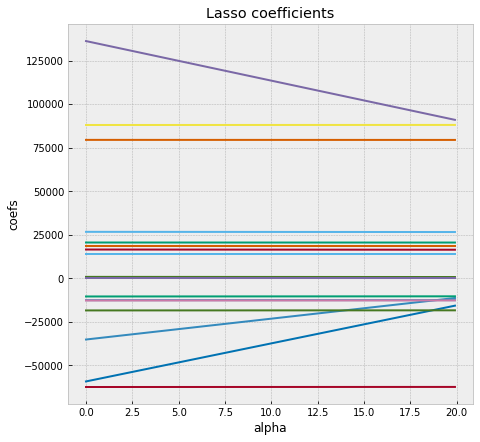

In [0]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 


### **Elastic Net Regression**

In [0]:
# Loading our data

house.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,WaterFront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,ZipCode,Latitude,Longitude,Sqft_Living15,Sqft_Lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [0]:
# Using the same vales of X and y to create a baseline model

regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

17178997107.644695


In [0]:
# Showing the coefficients for this first model

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Bathrooms': 39402.73548958096,
 'Bedrooms': 19095.552313937063,
 'Condition': 87583.17559277253,
 'Floors': 7.275957614183426e-12,
 'Grade': 32928.68464806824,
 'Latitude': -12350.772544227197,
 'Longitude': 26187.861810765196,
 'Price': -12193.732694161687,
 'Sqft_Above': 14896.352094277108,
 'Sqft_Basement': -63211.97131881058,
 'Sqft_Living': 3137.866542582009,
 'Sqft_Living15': -12145.062009793015,
 'Sqft_Lot': 16382.87345299705,
 'View': 18767.646250738704,
 'WaterFront': 15508.184398650132,
 'Year_Built': 3.637978807091713e-12,
 'Year_Renovated': -17570.157457846344,
 'ZipCode': 79577.46007966962}

In [0]:
# Inorder to use elastic net regression, we require normalized data set inside the function.
# This is done by creating a grid

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# Fitting our model inorder to determine the best results we can obtain from them
search.fit(X, y)
search.best_params_
abs(search.best_score_)

17388209967.006035

In [111]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8.
# Fitting the hyperparameter values on our data

elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

31572445468.188343


In [113]:
# Coefficients of the elastic regression model

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The Floor and the Year built columns have been completely removed by the regression model.
# This shows that it was irrelevant to our data 
# The regression model also gives the lowest coefficients as compared to ridge regression, quantile and lasso regressions.

{'Bathrooms': 18425.86202415906,
 'Bedrooms': 11146.737369490218,
 'Condition': 20956.899873390965,
 'Floors': 0.0,
 'Grade': 15056.286098890005,
 'Latitude': -1277.5582882978765,
 'Longitude': 16386.569736054284,
 'Price': 6434.456770105596,
 'Sqft_Above': 7591.291554630418,
 'Sqft_Basement': -4104.801590751731,
 'Sqft_Living': 1642.398439145898,
 'Sqft_Living15': 974.5093814200977,
 'Sqft_Lot': 7094.65837035842,
 'View': 4554.751112029275,
 'WaterFront': 6727.919908477161,
 'Year_Built': 0.0,
 'Year_Renovated': 797.1904262343455,
 'ZipCode': 19968.700800339375}

## 8. Challenging the solution


## 9. Follow up questions


### a). Did we have the right data?


### b). Do we need other data to answer our question?


### c). Did we have the right question?